In [1]:
import os
from PIL import Image
import numpy
from matplotlib import pyplot
import keras
import pandas

In [2]:
class MyImage:  # 이미지
    def __init__(self, image: Image, name: str) -> None:
        self.image = image  # 데이터
        self.name = name  # 이름

    def show(self):  # 이미지표시
        self.image.show()

    def getArray(self):  # 배열화
        return numpy.array(self.image)

In [3]:
class ImageLoader:  # 자료 불러오기
    def __init__(self) -> None:
        pass

    def load(  # 불러오기
        self,
        storedDir: str = 'data',  # 학습자료경로
        inputDir: str = 'input'  # 검증자료경로
    ):

        storedImage = []

        dirList = os.listdir(storedDir)
        for dirName in dirList:
            if dirName != "README":
                imageList = dirList = os.listdir(
                    os.path.join(storedDir, dirName))
                for imageName in imageList:
                    tmpImage = MyImage(image=Image.open(
                        os.path.join(storedDir, dirName, imageName)), name=dirName)
                    storedImage.append(tmpImage)

        self.storedImage = storedImage  # 학습자료

        inputImage = []

        imageList = os.listdir(inputDir)
        for imageName in imageList:
            tmpImage = Image.open(os.path.join(inputDir,  imageName))
            inputImage.append(
                MyImage(image=tmpImage, name=imageName[:-4]))

        self.inputImage = inputImage  # 검증자료

In [4]:

class AIClassifier:  # 기계학습기
    def __init__(self) -> None:
        pass

    def analyze(  # 분석하기
        self,
        imageData: list,  # 학습자료
        inputImage: list  # 검증자료
    ):
        self.imageData = imageData  # 학습자료
        self.inputImgage = inputImage  # 검증자료

        result = []

        # euclidean distance
        for x in self.inputImgage:
            k = 5
            value = []
            for y in self.imageData:
                value.append(
                    numpy.sum(numpy.square(x.getArray()-y.getArray())))

            index = numpy.argsort(value)

            # find nearest
            name = {'s1': 0, 's2': 0, 's3': 0, 's4': 0, 's5': 0, 's6': 0, 's7': 0, 's8': 0, 's9': 0, 's10': 0, 's11': 0, 's12': 0, 's13': 0, 's14': 0, 's15': 0, 's16': 0, 's17': 0, 's18': 0, 's19': 0, 's20': 0,
                    's21': 0, 's22': 0, 's23': 0, 's24': 0, 's25': 0, 's26': 0, 's27': 0, 's28': 0, 's29': 0, 's30': 0, 's31': 0, 's32': 0, 's33': 0, 's34': 0, 's35': 0, 's36': 0, 's37': 0, 's38': 0, 's39': 0, 's40': 0}
            for i in range(0, len(index)):
                if index[i] < k:
                    name[self.imageData[i].name] += 1
            tmp = [0, '']
            for x in name:
                if tmp[0] < name[x]:
                    tmp = [name[x], x]

            result.append(tmp[1])

        self.result = result  # 검증결과

In [5]:

class KerasClassifier:  # 심층학습기
    def __init__(self) -> None:
        self.model = keras.Sequential([  # MLP모델
            keras.layers.Input(shape=(112, 92)),
            keras.layers.Flatten(),
            keras.layers.Dense(10000, activation='relu'),
            keras.layers.Dense(40, activation='softmax'),
        ])

        self.model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                           loss=keras.losses.SparseCategoricalCrossentropy(),
                           metrics=['accuracy'])
        pass

    def anayze(  # 분석
        self,
        imageData: list,  # 학습자료
        inputImage: list  # 검증자료
    ):

        train_images = []
        train_labels = []
        for image in imageData:
            train_images.append(image.getArray())
            train_labels.append(int(image.name[1:]))
        train_images = numpy.array(train_images)/255
        train_labels = numpy.array(train_labels)
        train_labels -= 1

        test_images = []
        test_labels = []
        for image in inputImage:
            test_images.append(image.getArray())
            test_labels.append(int(image.name[1:]))
        test_images = numpy.array(test_images)/255
        test_labels = numpy.array(test_labels)
        test_labels -= 1

        self.history = self.model.fit(  # 학습결과
            train_images, train_labels, epochs=20, validation_data=(
                test_images, test_labels), callbacks=[keras.callbacks.EarlyStopping(
                    monitor='val_accuracy', patience=3)]
        )

        prediction = self.model.predict(test_images)
        prediction = numpy.argmax(prediction, axis=1)

        result = []
        for i in prediction:
            result.append('s'+str(i+1))
        self.result = result  # 검증결과

    def plot(self):  # 학습그래프
        pandas.DataFrame(self.history.history).plot()

In [6]:
class MyReport:  # 보고서작성기
    def __init__(self) -> None:
        pass

    def plot(
        self,
        inputData: list,  # 검증자료
        result: list  # 검증결과
    ):

        # true
        true = []
        for i in range(0, len(inputData)):
            if inputData[i].name == result[i]:
                true.append([inputData[i], result[i]])

        pyplot.figure('true')
        for i in range(0, len(true)):
            pyplot.subplot(len(true), 1, i+1)
            pyplot.imshow(true[i][0].image)
            pyplot.text(100, 50, 'input: ' + true[i][0].name)
            pyplot.text(100, 100, 'output: ' + true[i][1])
            pyplot.gca().axes.xaxis.set_visible(False)
            pyplot.gca().axes.yaxis.set_visible(False)

        pyplot.figtext(0.05, 0.05, 'true count: '+str(len(true)))

        # faulse
        faulse = []
        for i in range(0, len(inputData)):
            if inputData[i].name != result[i]:
                faulse.append([inputData[i], result[i]])

        pyplot.figure('faulse')
        for i in range(0, len(faulse)):
            pyplot.subplot(len(faulse), 1, i+1)
            pyplot.imshow(faulse[i][0].image)
            pyplot.text(100, 50, 'input: ' + faulse[i][0].name)
            pyplot.text(100, 100, 'output: ' + faulse[i][1])
            pyplot.gca().axes.xaxis.set_visible(False)
            pyplot.gca().axes.yaxis.set_visible(False)

        pyplot.figtext(0.05, 0.05, 'faulse count: '+str(len(faulse)))
        pyplot.show()

In [7]:

data = ImageLoader()
myAI = AIClassifier()
myKeras = KerasClassifier()
report = MyReport()

In [8]:

data.load(storedDir='data',inputDir='input')
data.storedImage[0].show()
data.storedImage[0].getArray()

array([[48, 49, 45, ..., 56, 56, 54],
       [45, 52, 39, ..., 52, 50, 51],
       [45, 50, 42, ..., 48, 53, 50],
       ...,
       [50, 48, 50, ..., 45, 46, 46],
       [45, 54, 49, ..., 46, 47, 47],
       [51, 51, 51, ..., 47, 46, 46]], dtype=uint8)

In [9]:
data.inputImage

In [10]:
data.storedImage

In [11]:

myAI.analyze(imageData=data.storedImage, inputImage=data.inputImage)
myAI.result

['s1',
 's2',
 's11',
 's3',
 's37',
 's12',
 's4',
 's1',
 's1',
 's22',
 's10',
 's2',
 's38',
 's5',
 's34',
 's4',
 's2',
 's38',
 's24',
 's12',
 's10',
 's6',
 's36',
 's4',
 's4',
 's17',
 's40',
 's9',
 's18',
 's10',
 's10',
 's3',
 's9',
 's17',
 's3',
 's23',
 's13',
 's4',
 's22',
 's21']

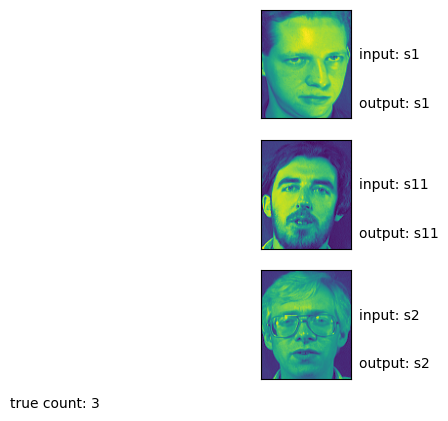

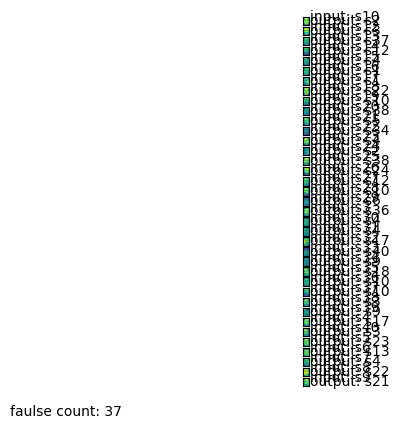

In [12]:

report.plot(inputData=data.inputImage, result=myAI.result)

In [13]:
myKeras.model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 10304)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 10000)             │ 103,050,0… │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 40)                │    400,040 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 103,450,040 (394.63 MB)

 Trainable params: 103,450,040 (394.63 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:

myKeras.anayze(imageData=data.storedImage,
               inputImage=data.inputImage)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 720ms/step - accuracy: 0.0495 - loss: 6.6470 - val_accuracy: 0.0250 - val_loss: 4.8057
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 702ms/step - accuracy: 0.1031 - loss: 4.3827 - val_accuracy: 0.3000 - val_loss: 3.3607
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 704ms/step - accuracy: 0.2892 - loss: 3.2820 - val_accuracy: 0.4250 - val_loss: 2.5050
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 701ms/step - accuracy: 0.4795 - loss: 2.7177 - val_accuracy: 0.6000 - val_loss: 2.1076
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 704ms/step - accuracy: 0.6001 - loss: 1.8712 - val_accuracy: 0.7250 - val_loss: 1.8542
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 709ms/step - accuracy: 0.8169 - loss: 1.3510 - val_accuracy: 0.7750 - val_loss: 1.5426
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 713ms/step - accuracy: 0.8541 - loss: 1.0674 - val_accuracy: 0.8500 - val_loss: 1.3277
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 706ms/step - accuracy: 0.9246 - loss: 0.7858 - val_accuracy: 0

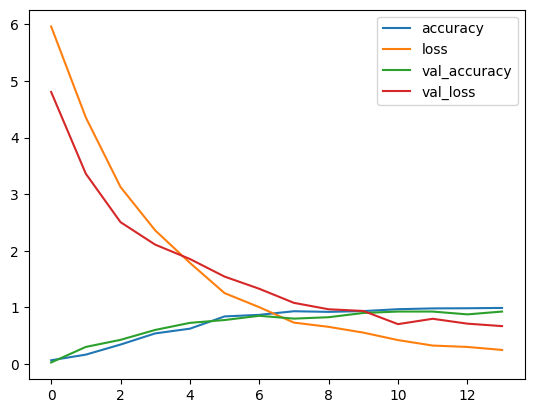

In [15]:
myKeras.plot()

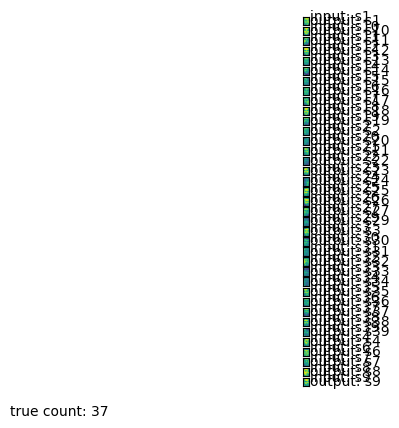

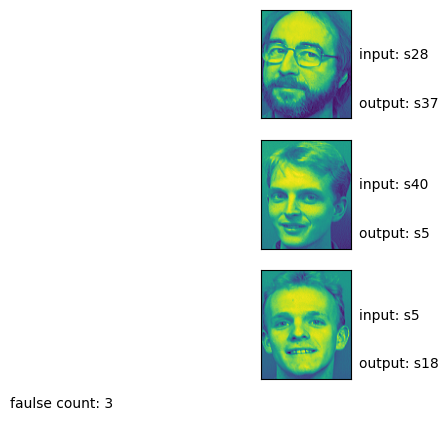

In [16]:

report.plot(inputData=data.inputImage, result=myKeras.result)